IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE

In [129]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime


The goal of this Quest is to do a one step ahead forecast of the Miles Traveled data.
## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv". Figure out how to set the date to a datetime index columns

In [130]:
import requests
import os
import pandas as pd


def telecharger_et_charger_fichier(url, dossier_destination=None):
    """
    Télécharge un fichier depuis une URL donnée, le sauvegarde dans un dossier spécifié,
    Si le dossier n'existe pas il est crée
    Par defaut enregistre le fichier dans un repertoire ../datas qui est à la racine du projet
    et charge le fichier dans un DataFrame en fonction de son format.

    :param url: URL du fichier à télécharger.
    :param dossier_destination: Dossier de destination optionnel pour le fichier.
    :return: Tuple contenant le DataFrame original, sa copie, et le nom du fichier.
    """
    # Initialiser df_original et df à None
    df_original, df = None, None
    try:
        # Déterminer le nom du fichier à partir de l'URL
        nom_fichier = url.split('/')[-1]

        # Construire le chemin absolu du dossier de destination
        if dossier_destination is None:
            # Chemin par défaut relatif au script
            chemin_script = os.path.dirname(os.path.abspath(__file__))
            chemin_complet = os.path.join(
                chemin_script, "..", "datas", nom_fichier)
        else:
            # Utiliser le chemin de destination fourni
            chemin_complet = os.path.join(dossier_destination, nom_fichier)

        # Créer le dossier de destination s'il n'existe pas
        os.makedirs(os.path.dirname(chemin_complet), exist_ok=True)

        # Télécharger le fichier
        response = requests.get(url)
        response.raise_for_status()

        # Écrire le contenu dans le fichier de destination
        with open(chemin_complet, 'wb') as file:
            file.write(response.content)

        # Déterminer l'extension du fichier et charger dans un DataFrame
        extension = nom_fichier.split('.')[-1].lower()
        if extension in ['csv', 'txt']:
            df_original = pd.read_csv(chemin_complet, encoding='utf-8')
        elif extension == 'json':
            df_original = pd.read_json(
                chemin_complet, encoding='utf-8', orient='records')
        elif extension == 'xlsx':
            df_original = pd.read_excel(chemin_complet, index_col=0)
        else:
            print(f"Format de fichier non pris en charge : {extension}")

        # Faire une copie du DataFrame si celui-ci a été chargé
        if df_original is not None:
            df = df_original.copy()

        return df_original, df, chemin_complet

    except requests.HTTPError as http_err:
        print(f"Erreur HTTP lors du téléchargement du fichier : {http_err}")
        return None, None, None
    except Exception as err:
        print(
            f"Une erreur est survenue lors du téléchargement du fichier : {err}")
        return None, None, None


In [131]:
%%time
# Chargement du df
url="https://raw.githubusercontent.com/crajapax/GDAtrack3b/main/Miles_Traveled.csv"
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
# df_original, df, nom_fichier = telecharger_et_charger_csv(url)
df_original, df, nom_fichier = telecharger_et_charger_fichier( url, "datas/csv")


CPU times: total: 453 ms
Wall time: 656 ms


In [132]:
# fichier déja enrefistré suer le disque
df_original = pd.read_csv('Miles_Traveled.csv')


In [133]:
df = df_original.copy()


In [134]:
df.dropna()


,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173
1,1970-02-01,77442
2,1970-03-01,90223
3,1970-04-01,89956
4,1970-05-01,97972
...,...,...
569,2018-08-01,286608
570,2018-09-01,260595
571,2018-10-01,282174
572,2018-11-01,258590


In [135]:
# pd.read_csv(path, encoding='utf-8')
# Convertir l'index en datetime si ce n'est pas déjà le cas
df["DATE"] = pd.to_datetime(df['DATE'])


In [136]:
#  colonne date en index
df.set_index('DATE', inplace=True)


In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 574 entries, 1970-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   TRFVOLUSM227NFWA  574 non-null    int64
dtypes: int64(1)
memory usage: 9.0 KB


In [138]:
df.index


DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='DATE', length=574, freq=None)

In [139]:
# data = pd.read_csv(path)
# set the date as the index of our dataframe, ie. each of our datapoints correspond to a date
# df.set_index('DATE',parse_dates=True)
# df=data.copy()
# df.index.reset_index()
# df.index=df.index.freq('MS')

df.index.asfreq = 'MS'


In [140]:
df


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173
1970-02-01,77442
1970-03-01,90223
1970-04-01,89956
1970-05-01,97972
...,...
2018-08-01,286608
2018-09-01,260595
2018-10-01,282174


**Task: Change the column names to Value**

In [141]:
# CODE HERE
df.rename(columns={'TRFVOLUSM227NFWA': 'Value'}, inplace=True)
df


,Value
DATE,
1970-01-01,80173
1970-02-01,77442
1970-03-01,90223
1970-04-01,89956
1970-05-01,97972
...,...
2018-08-01,286608
2018-09-01,260595
2018-10-01,282174


**TASK: Plot out the time series**

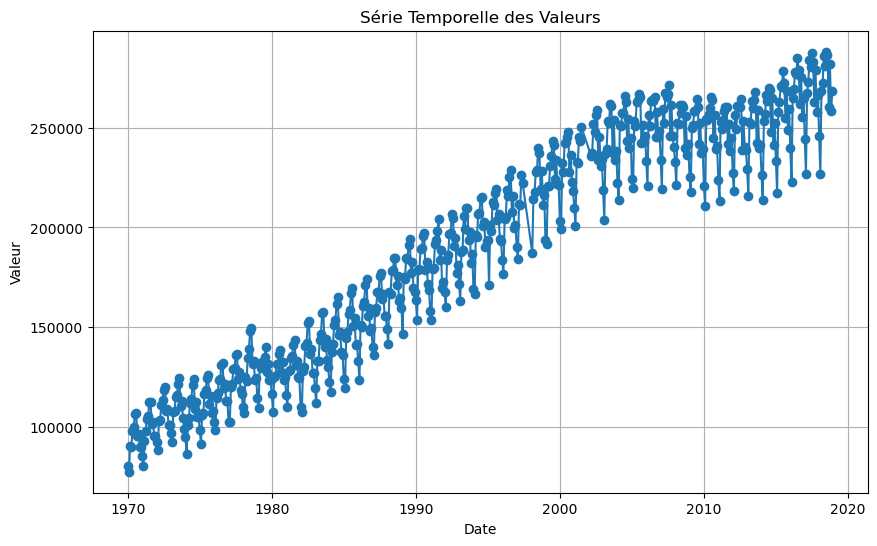

In [142]:
# CODE HERE
# Tracé de la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], marker='o')
plt.title('Série Temporelle des Valeurs')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.grid(True)
plt.show()


**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

<Figure size 1200x800 with 0 Axes>

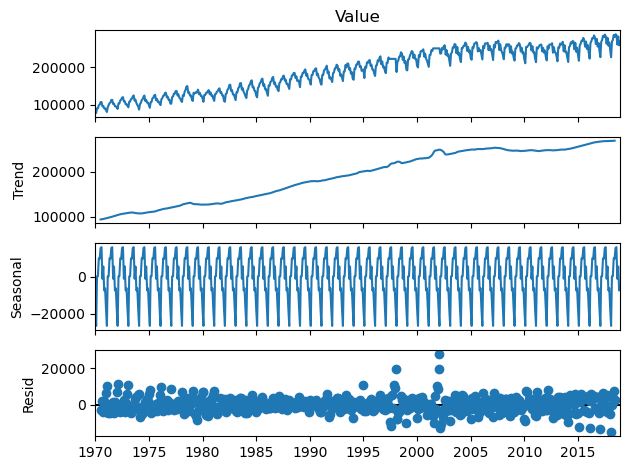

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Remplacer les valeurs manquantes par un remplissage vers l'avant
df_resampled_filled = df_resampled.fillna(method='ffill')

# Tentative de décomposition saisonnière à nouveau
decomposition_filled = seasonal_decompose(
    df_resampled_filled['Value'], model='additive')

# Tracer la décomposition saisonnière
plt.figure(figsize=(12, 8))
decomposition_filled.plot()
plt.show()


## Train Test Split

**TASK: Figure out the length of the data set**

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [144]:
df


,Value
DATE,
1970-01-01,80173
1970-02-01,77442
1970-03-01,90223
1970-04-01,89956
1970-05-01,97972
...,...
2018-08-01,286608
2018-09-01,260595
2018-10-01,282174


In [145]:
# # Vérifier la forme de X_train
# print("Forme de X_train:", X_train.shape)

# # Vérifier si la date limite est appropriée
# print("Date limite:", date_limite)
# print("Dates maximales et minimales dans le DataFrame:",
#       df.index.max(), df.index.min())

# # Si X_train est vide, corrigez la division de vos données
# if X_train.shape[0] == 0:
#     print("X_train est vide. Vérifiez la division de vos données.")


In [146]:
# CODE HERE
# Importer la bibliothèque pandas
import pandas as pd

# S'assurer que les données sont triées par date
# df.sort_values(inplace=True)

# Définir une date un an (12 mois) avant la dernière date dans les données
date_limite = df.index.max() - pd.DateOffset(years=1)

# Créer les ensembles de données d'entraînement et de test
X_train = df[df.index <= date_limite]
X_test = df[df.index > date_limite]

# Séparer les valeurs cibles pour l'entraînement et le test
y_train = X_train['Value']
y_test = X_test['Value']

# Vous pouvez choisir de supprimer la colonne 'Value' de X_train et X_test si elle ne sert pas de caractéristique
# X_train = X_train.drop(columns=['Value'])
# X_test = X_test.drop(columns=['Value'])

# Enregistrer dans des fichiers
X_train.to_csv('train_Miles_Traveled.csv', encoding='utf-8')
X_test.to_csv('test_Miles_Traveled.csv', encoding='utf-8')
y_train.to_csv('y_train.csv', encoding='utf-8')
y_test.to_csv('y_test.csv', encoding='utf-8')


In [147]:
y_train


DATE
1970-01-01     80173
1970-02-01     77442
1970-03-01     90223
1970-04-01     89956
1970-05-01     97972
               ...  
2017-08-01    283184
2017-09-01    262673
2017-10-01    278937
2017-11-01    257712
2017-12-01    266535
Name: Value, Length: 562, dtype: int64

In [148]:
X_train


,Value
DATE,
1970-01-01,80173
1970-02-01,77442
1970-03-01,90223
1970-04-01,89956
1970-05-01,97972
...,...
2017-08-01,283184
2017-09-01,262673
2017-10-01,278937


In [149]:
# Calcul de la longueur du jeu de données
longueur_dataset = len(df)

longueur_dataset


574

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [150]:
from sklearn.preprocessing import MinMaxScaler

# Création du scaler, qui mettra les données à l'échelle entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajustement du scaler sur les données d'entraînement (X_train)
scaler.fit(X_train.values.reshape(-1, 1))

# Transformation des ensembles d'entraînement et de test (X)
X_train_scaled = scaler.transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

# Transformation des cibles (y)
y_train_scaled = scaler.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Conversion des données mises à l'échelle en DataFrame pour une utilisation ultérieure
X_train_scaled_df = pd.DataFrame(
    X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(
    X_test_scaled, index=X_test.index, columns=X_test.columns)

# Conversion des cibles mises à l'échelle en DataFrame (si nécessaire)
y_train_scaled_df = pd.DataFrame(
    y_train_scaled, index=y_train.index, columns=['Value'])
y_test_scaled_df = pd.DataFrame(
    y_test_scaled, index=y_test.index, columns=['Value'])

# Remplir les NaN par interpolation
train_scaled = pd.DataFrame(train_scaled).interpolate().values

# Vérification  si des valeurs NaN existent
print("NaN dans train_scaled après interpolation:", np.isnan(train_scaled).any())


NaN dans train_scaled après interpolation: False


In [151]:
train_scaled_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 576 entries, 1970-01-01 to 2017-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   562 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


# Time Series Generator

We Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12. n_input refers to the window size, ie. length of your sequence.
We want to do a one step ahead forecast.

In [152]:
train_scaled_df


,Value
DATE,
1970-01-01,0.013011
1970-02-01,0.000000
1970-03-01,0.060891
1970-04-01,0.059619
1970-05-01,0.097808
...,...
2017-08-01,0.980186
2017-09-01,0.882468
2017-10-01,0.959953


In [153]:
import numpy as np

# Vérifier si des valeurs NaN ou infinies existent
print("NaN dans train_scaled:", np.isnan(train_scaled).any())
print("Infini dans train_scaled:", np.isinf(train_scaled).any())

# Des valeurs NaN ou infinies sont trouvées, vous devez les traiter avant l'entraînement


NaN dans train_scaled: False
Infini dans train_scaled: False


In [161]:
# Re-importation des bibliothèques nécessaires et rechargement des données
import pandas as pd

# Recharger les fichiers
train_df = pd.read_csv('train_Miles_Traveled.csv',
                       index_col='DATE', parse_dates=True)
test_df = pd.read_csv('test_Miles_Traveled.csv',
                      index_col='DATE', parse_dates=True)

# Vérifications de base sur les données

# Vérifier si des valeurs NaN existent dans les données d'entraînement et de test
nan_in_train = train_df.isna().any().any()
nan_in_test = test_df.isna().any().any()

# Vérifier les formes des DataFrames d'entraînement et de test
train_shape = train_df.shape
test_shape = test_df.shape

nan_in_train, nan_in_test, train_shape, test_shape


(False, False, (562, 1), (12, 1))

In [162]:
# Traitement des valeurs NaN dans train_df par interpolation
train_df_filled = train_df.interpolate()

# Vérifier à nouveau si des valeurs NaN existent
nan_in_train_filled = train_df_filled.isna().any().any()

# Afficher les premières lignes des données après interpolation
train_df_filled_head = train_df_filled.head()

nan_in_train_filled, train_df_filled_head


(False,
             Value
 DATE             
 1970-01-01  80173
 1970-02-01  77442
 1970-03-01  90223
 1970-04-01  89956
 1970-05-01  97972)

In [156]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [163]:
n_input = 12  # you might need to test a variety of input values and test performance,
# but at least 12 to capture one cycle of seasonality

n_features = 1  # for univariate time series always 1

# Create input data from time series with generator object
# we put in the train data 2, once as actual train data, once as target variable, specify window length =n_input
# smaller batch sizes tend to work better
# CAREFUL: adjust the following 'scaled_train' to the name of your train object
generator = TimeseriesGenerator(
    train_df_filled, train_df_filled, sampling_rate=1, length=n_input, batch_size=1)

generator


TASK: inspect the output of the TimeSeriesGenerator

In [158]:
print("Taille de train_scaled_df:", train_scaled_df.shape)
# Ajustez n_input si nécessaire
n_input = min(n_input, len(train_scaled_df) - 1)


Taille de train_scaled_df: (576, 1)


In [184]:
print(f"\n n_input:\n{n_input} \n")
print(f"\n n_features:\n{n_features} \n")



 n_input:
12 


 n_features:
1 



In [166]:
# Convertir train_scaled_df en numpy array
train_scaled_array = train_df_filled.values

# Vérifier la forme
print("Forme de train_scaled_array:", train_scaled_array.shape)

# Recréer le TimeSeriesGenerator avec le numpy array
generator = TimeseriesGenerator(
    train_scaled_array, train_scaled_array, length=n_input, batch_size=1)

# Tenter d'itérer à nouveau sur les premiers lots
for i in range(2):
    x, y = generator[i]
    print(f"Lot {i+1}")
    print("X:", x)
    print("Y:", y)
    print('---' * 10)


Forme de train_scaled_array: (562, 1)
Lot 1
X: [[[ 80173]
  [ 77442]
  [ 90223]
  [ 89956]
  [ 97972]
  [100035]
  [106392]
  [106969]
  [ 95254]
  [ 96317]
  [ 89684]
  [ 89911]]]
Y: [[85336]]
------------------------------
Lot 2
X: [[[ 77442]
  [ 90223]
  [ 89956]
  [ 97972]
  [100035]
  [106392]
  [106969]
  [ 95254]
  [ 96317]
  [ 89684]
  [ 89911]
  [ 85336]]]
Y: [[80118]]
------------------------------


### Create the Model

Create a Keras Sequential Model with as many LSTM units as you want and a final Dense Layer.

In [168]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.initializers import GlorotUniform

# Initialisation du modèle séquentiel
model = Sequential()

# Ajout d'une couche LSTM
model.add(LSTM(150, activation='tanh', input_shape=(
    n_input, n_features), kernel_initializer=GlorotUniform()))

# Ajout de la couche Dense finale
model.add(Dense(1))

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 150)               91200     
                                                                 
 dense_10 (Dense)            (None, 1)                 151       
                                                                 
Total params: 91351 (356.84 KB)
Trainable params: 91351 (356.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Faire des prédictions
y_pred = model.predict(X_test)

# Calculer MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculer MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


1/1 [==============================] - 1s 546ms/step
Mean Squared Error (MSE): 72538519033.15634
Mean Absolute Percentage Error (MAPE): 0.9999986354828083


Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [182]:
# fit model
history = model.fit(generator, epochs=30)


Epoch 1/30
 22/550 [>.............................] - ETA: 2s - loss: 43460825088.0000

550/550 [==============================] - 2s 4ms/step - loss: 39123181568.0000
Epoch 2/30
550/550 [==============================] - 2s 4ms/step - loss: 39115132928.0000
Epoch 3/30
550/550 [==============================] - 2s 4ms/step - loss: 39107100672.0000
Epoch 4/30
550/550 [==============================] - 2s 4ms/step - loss: 39099047936.0000
Epoch 5/30
550/550 [==============================] - 2s 4ms/step - loss: 39090982912.0000
Epoch 6/30
550/550 [==============================] - 2s 4ms/step - loss: 39082938368.0000
Epoch 7/30
550/550 [==============================] - 2s 4ms/step - loss: 39074897920.0000
Epoch 8/30
550/550 [==============================] - 2s 4ms/step - loss: 39066824704.0000
Epoch 9/30
550/550 [==============================] - 2s 4ms/step - loss: 39058788352.0000
Epoch 10/30
550/550 [==============================] - 2s 4ms/step - loss: 39050723328.0000
Epoch 11/30
550/550 [==============================] - 2s 4ms/step - loss: 39042682880.0000
Epoch 12

**TASK: Plot the history of the loss that occured during training.**

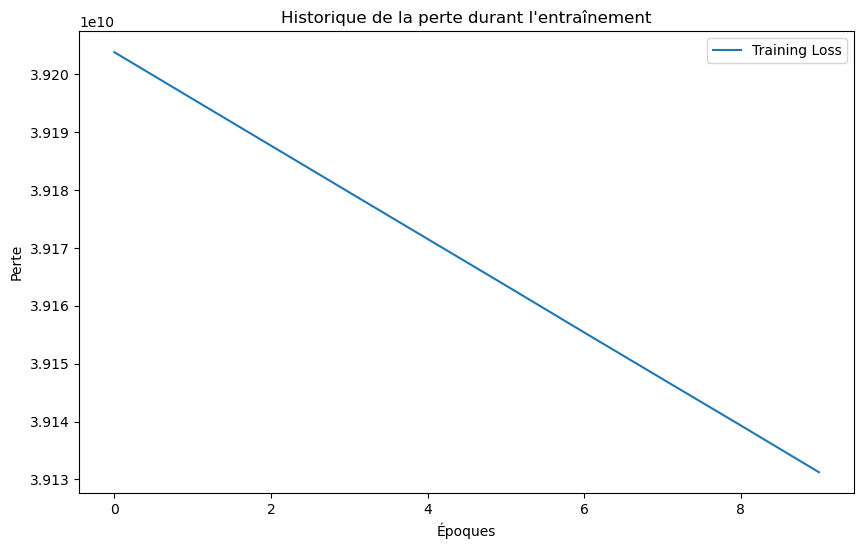

In [173]:
# CODE HERE
import matplotlib.pyplot as plt

# Supposons que vous avez déjà formé votre modèle et enregistré l'historique
# history = model.fit(...)

# Extraire les valeurs de perte
loss = history.history['loss']

# Tracer le graphique de la perte
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.title('Historique de la perte durant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


dict_keys(['loss'])

# Evaluate on Test Data

Based on your test data and input size, create an appropriately sized "first evaluation batch"

In [194]:
# Sélectionnez les derniers points de données de l'ensemble d'entraînement
first_eval_batch = train_scaled[-n_input:]

# Redimensionnez le lot pour correspondre au format attendu par le modèle
# Le nouveau format doit être [1, n_input, n_features]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

# Maintenant, vous pouvez utiliser ce lot pour faire une première prédiction
first_pred = model.predict(first_eval_batch)



1/1 [==============================] - 0s 116ms/step


In [195]:
first_eval_batch


array([[[0.79630397],
        [0.71226435],
        [0.90477416],
        [0.93121043],
        [0.98386382],
        [0.96757519],
        [1.        ],
        [0.9801859 ],
        [0.8824684 ],
        [0.95995255],
        [0.85883345],
        [0.90086755]]])

**TASK: predict the first point of the test dataset**

In [198]:
# Code here
# Sélectionnez les derniers points de données de l'ensemble d'entraînement
last_train_batch = train_scaled[-n_input:]

# Redimensionnez le lot pour correspondre au format attendu par le modèle
# Le format doit être [1, n_input, n_features]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

# Faire la prédiction pour le premier point de l'ensemble de test
first_test_prediction = model.predict(last_train_batch)

# Appliquer la transformation inverse pour obtenir la valeur originale
first_test_prediction_original = scaler.inverse_transform(first_test_prediction)

print("First test prediction (original scale):", first_test_prediction_original)


1/1 [==============================] - 0s 102ms/step
First test prediction (original scale): [[18712320.]]


## Now let's put this logic in a for loop to predict into the future for the entire test range.


**TASK: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [200]:
# FORECAST USING RNN MODEL

test_predictions = []
first_eval_batch = train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(X_test)):
    # Obtenir la prédiction actuelle
    current_pred = model.predict(current_batch)[0]

    # Ajouter la prédiction à la liste des prédictions
    test_predictions.append(current_pred)

    # Mettre à jour le lot pour inclure la nouvelle prédiction
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

    # Imprimez pour comprendre les dimensions et les valeurs
    print(f"Prédiction {i}: {current_pred}")
    print(f"Dimensions actuelles du lot: {current_batch.shape}")

# Appliquer la transformation inverse pour obtenir les valeurs originales
test_predictions_original = scaler.inverse_transform(test_predictions)

# Imprimer les prédictions finales
print("Prédictions finales (échelle originale):")
print(test_predictions_original)



1/1 [==============================] - 0s 117ms/step
Prédiction 0: [88.77937]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 128ms/step


Prédiction 1: [797.4072]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 35ms/step
Prédiction 2: [1010.81506]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 40ms/step
Prédiction 3: [1037.2338]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 47ms/step
Prédiction 4: [1042.4423]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 31ms/step
Prédiction 5: [1043.5781]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 28ms/step
Prédiction 6: [1043.8472]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 28ms/step
Prédiction 7: [1043.9186]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 45ms/step
Prédiction 8: [1043.9442]
Dimensions actuelles du lot: (1, 12, 1)
1/1 [==============================] - 0s 27ms/step
Prédiction 9: [1043.9595]
Dimensions actuelles du lot: (

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions to retrieve back the original and not the scaled values**

In [209]:
# invert scale to get back true predicted values!
# CODE HERE
# Appliquer la transformation inverse pour obtenir les valeurs originales
test_predictions_original = scaler.inverse_transform(test_predictions)

# Imprimer les prédictions finales
print("Prédictions finales (échelle originale):")
print(test_predictions_original)


Prédictions finales (échelle originale):
[[1.87123212e+07]
 [1.67454016e+08]
 [2.12248535e+08]
 [2.17793846e+08]
 [2.18887115e+08]
 [2.19125534e+08]
 [2.19182006e+08]
 [2.19196996e+08]
 [2.19202376e+08]
 [2.19205579e+08]
 [2.19209500e+08]
 [2.19214265e+08]]


In [212]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, test_predictions_original)
mae = mean_absolute_error(y_test, test_predictions_original)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 4.198437364239178e+16
Mean Absolute Error (MAE): 197183934.51748785


array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [219]:
# CODE HERE

# Ajuster la longueur de test_predictions_original pour qu'elle corresponde à celle de y_test_original
test_predictions_adjusted = test_predictions_original[-len(y_test):]

# Créer un DataFrame avec les valeurs réelles et les prédictions
results_df = pd.DataFrame({
    'Original': y_test.ravel(),  # Convertir en un tableau 1D si nécessaire
    'Predictions': test_predictions_adjusted.ravel()  # De même, convertir en 1D si nécessaire
})

print(results_df)



    Original   Predictions
0     245695  1.871232e+07
1     226660  1.674540e+08
2     268480  2.122485e+08
3     272475  2.177938e+08
4     286164  2.188871e+08
5     280877  2.191255e+08
6     288145  2.191820e+08
7     286608  2.191970e+08
8     260595  2.192024e+08
9     282174  2.192056e+08
10    258590  2.192095e+08
11    268413  2.192143e+08


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

KeyError: 'Predictions'

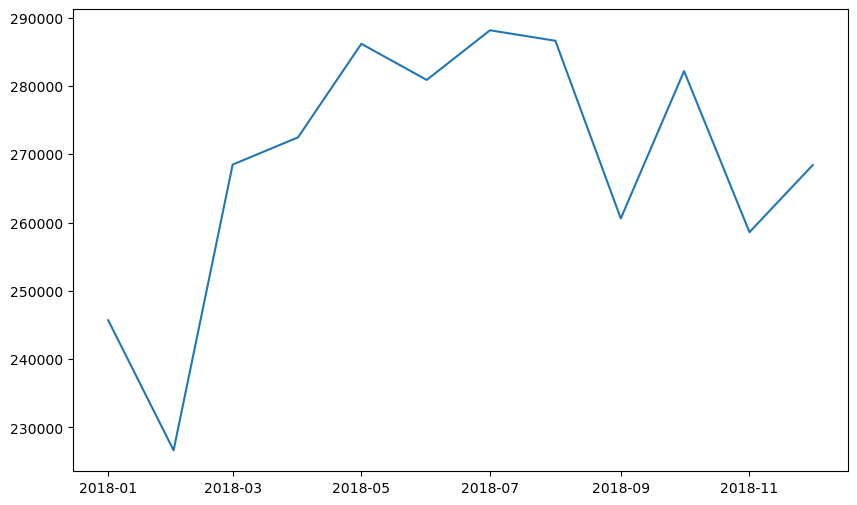

In [222]:
# CODE HERE
# Import necessary library
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10,6))

# Plot original test values
plt.plot(df['Original'], label='Original')

# Plot predictions
plt.plot(df['Predictions'], label='Predictions')

# Add legend
plt.legend()

# Display the plot
plt.show()


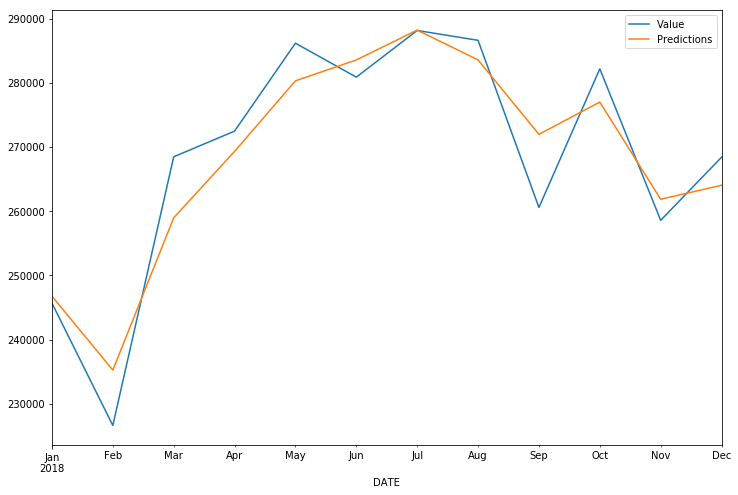

# Saving Models

**TASK: Optional, Save your model!**

In [186]:

# Sauvegarder l'architecture du modèle au format JSON
model_json = model.to_json()
with open("model_LSTM.json", "w") as json_file:
    json_file.write(model_json)

# Sauvegarder les poids du modèle au format HDF5
model.save_weights("model_LSTM_weights.h5")

from keras.models import model_from_json

# Charger l'architecture du modèle à partir du fichier JSON
with open("model_LSTM.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Charger les poids du modèle à partir du fichier HDF5
loaded_model.load_weights("model_LSTM_weights.h5")


